# 1번

In [1]:
import numpy as np

In [6]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [8]:
np.arange(1, 11, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
np.identity((3),dtype="i8")

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [12]:
np.ones((1, 4, 4), dtype="i8")

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int64)

In [17]:
np.arange(1, 24, 2).reshape(3,4)

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

# 2번

In [23]:
import pandas as pd

data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
   
}
columns = ["지역", "2015", "2010", "2005", "2000"]
index = ["서울", "부산", "인천", "대구"]

df = pd.DataFrame(data, index=index, columns=columns)

df["2010-2015 증가율"] = ((df["2015"] - df["2010"]) / df["2010"] * 100).round(2)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.64
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


# 3번

In [27]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

#성별 인원수
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [28]:
#선실별 인원수
titanic.pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: pclass, dtype: int64

In [29]:
#사망/생존 인원수
titanic.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [33]:
bins = [1, 15, 30, 45, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

titanic_age = pd.cut(titanic["age"], bins, labels = labels)
titanic["age_class"] = titanic_age

titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,청년
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,청년
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,청년
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,중년


In [42]:
(titanic['age_class'][titanic['survived']==0].value_counts(normalize =True)*100).round(2)

청년      49.53
중년      27.49
장년      11.37
미성년자     7.58
노년       4.03
Name: age_class, dtype: float64

In [43]:
(titanic['age_class'][titanic['survived']==1].value_counts(normalize =True)*100).round(2)

청년      42.09
중년      30.94
미성년자    13.31
장년      11.87
노년       1.80
Name: age_class, dtype: float64

# 4번

In [45]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = (tips['tip'] / tips['total_bill']).round(2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [49]:
#금요일과 일요일에 가장 높다.
(tips.groupby(["day"])[["tip_pct"]].mean()).round(2)

,tip_pct
day,
Thur,0.16
Fri,0.17
Sat,0.15
Sun,0.17


# 5번

In [96]:
import sqlite3
conn = sqlite3.connect("./test3.db") 
cur = conn.cursor()

In [97]:
cur.execute('CREATE TABLE IF NOT EXISTS Eagles \
    (back_no INT NOT NULL, \
      name TEXT, \
      position TEXT, \
     PRIMARY KEY(back_no));')

In [98]:
b_stats = pd.read_csv('./players.csv', encoding='EUC-KR')
b_stats

,back_no,name,position
0,7,송광민,내야수
1,50,이성열,내야수
2,43,정은원,내야수
3,8,정근우,내야수
4,25,최진행,외야수


In [99]:
cur = conn.cursor()
sql = 'INSERT INTO Eagles VALUES (?, ?, ?);'
for i in range(5):
    cur.execute(sql, (int(b_stats.iloc[i,0]), 
                      b_stats.iloc[i,1], 
                      str(b_stats.iloc[i,2])))
conn.commit()

In [100]:
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')
for row in cur:
    print(row)

(7, '송광민', '내야수')
(50, '이성열', '내야수')
(43, '정은원', '내야수')
(8, '정근우', '내야수')
(25, '최진행', '외야수')


In [101]:
cur = conn.cursor()
cur.execute("UPDATE Eagles SET position='외야수'  WHERE back_no=8;")
conn.commit()

In [107]:
cur.execute('SELECT * FROM Eagles ORDER BY back_no DESC LIMIT1') #결과로 튜플이 나온다! 
rows = cur.fetchall();
for row in rows:
    print(row)

(50, '이성열', '내야수')
(43, '정은원', '내야수')
(25, '최진행', '외야수')
(8, '정근우', '외야수')
(7, '송광민', '내야수')


In [111]:
cur = conn.cursor()
cur.execute("DELETE FROM Eagles WHERE back_no=50;")
conn.commit()

In [ ]:
conn.close()

# 6번

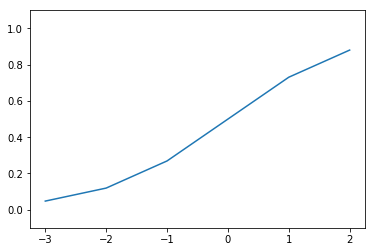

In [179]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
def sigmoid(x):
    result = 1 / (1 + np.exp(-x))
    return result

# X=np.linespace(-3,3,601)
x = np.arange(-3, 3)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

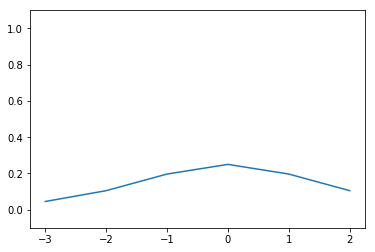

In [176]:
def der_sigmoid(x):
    result2 = sigmoid(x)*(1-sigmoid(x))
    return result2
              
%matplotlib inline
x = np.arange(-3, 3)
y = der_sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)

plt.show()

# 7번

- 경사하강법
- 학습률
- 퍼셉트론
- 렐루
- 은닉층

# 8번

- 25-3
- relu-softmax
- categorical_crossentropy
- epochs=100
- Accuracy: 0.9800    

In [125]:
from keras.models import Sequential
from keras.layers.core import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

df = pd.read_csv('Deep_data/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

Using TensorFlow backend.


In [126]:
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]
Y_obj[0], Y_obj[50], Y_obj[100]

('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

In [127]:
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [128]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [129]:
#One Hot Incoding
from keras.utils import np_utils
Y_encoded = np_utils.to_categorical(Y)
Y_encoded[0], Y_encoded[50], Y_encoded[100]

(array([1., 0., 0.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32))

In [135]:
# 모델의 설정
model = Sequential()
model.add(Dense(25,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax')) #3개이상 나올땐 softmax

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=100, batch_size=1)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/100
150/150 [==============================] - 0s 2ms/step - loss: 1.4748 - acc: 0.3267
Epoch 2/100
150/150 [==============================] - 0s 533us/step - loss: 0.9096 - acc: 0.5667
Epoch 3/100
150/150 [==============================] - 0s 540us/step - loss: 0.7152 - acc: 0.6933
Epoch 4/100
150/150 [==============================] - 0s 553us/step - loss: 0.6019 - acc: 0.7800
Epoch 5/100
150/150 [==============================] - 0s 553us/step - loss: 0.5346 - acc: 0.7533
Epoch 6/100
150/150 [==============================] - 0s 560us/step - loss: 0.4882 - acc: 0.7933
Epoch 7/100
150/150 [==============================] - 0s 553us/step - loss: 0.4432 - acc: 0.7867
Epoch 8/100
150/150 [==============================] - 0s 540us/step - loss: 0.4218 - acc: 0.8667
Epoch 9/100
150/150 [==============================] - 0s 553us/step - loss: 0.4071 - acc: 0.8533
Epoch 10/100
150/150 [==============================] - 0s 553us/step - loss: 0.3822 - acc: 0.9067
Epoch 11/100
150/150 

# 9번

- 15-8-1
- relu-relu-sigmoid
- binary_crossentropy
- epochs=2
- Accuracy: 0.7083

In [160]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import pandas as pd
import os
import numpy
# seed 값 생성
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('Deep_data/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [161]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv("Deep_data/pima-indians-diabetes.csv", delimiter=",")
df = df_pre.sample(frac=0.25)

dataset = df.values
X = dataset[:,0:8]
Y = dataset[:,8]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [166]:
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 모델 실행
model.fit(X_train, Y_train, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/200
144/144 [==============================] - 0s 3ms/step - loss: 3.5205 - acc: 0.6806
Epoch 2/200
144/144 [==============================] - 0s 76us/step - loss: 3.3161 - acc: 0.6667
Epoch 3/200
144/144 [==============================] - 0s 76us/step - loss: 3.1475 - acc: 0.6250
Epoch 4/200
144/144 [==============================] - 0s 76us/step - loss: 2.7707 - acc: 0.6528
Epoch 5/200
144/144 [==============================] - 0s 76us/step - loss: 1.8993 - acc: 0.6319
Epoch 6/200
144/144 [==============================] - 0s 76us/step - loss: 1.1819 - acc: 0.5625
Epoch 7/200
144/144 [==============================] - 0s 69us/step - loss: 1.0702 - acc: 0.5903
Epoch 8/200
144/144 [==============================] - 0s 83us/step - loss: 0.9190 - acc: 0.6250
Epoch 9/200
144/144 [==============================] - 0s 69us/step - loss: 0.8333 - acc: 0.6389
Epoch 10/200
144/144 [==============================] - 0s 76us/step - loss: 0.7363 - acc: 0.6736
Epoch 11/200
144/144 [========

144/144 [==============================] - 0s 69us/step - loss: 0.4132 - acc: 0.8056
Epoch 167/200
144/144 [==============================] - 0s 76us/step - loss: 0.4130 - acc: 0.8125
Epoch 168/200
144/144 [==============================] - 0s 69us/step - loss: 0.4149 - acc: 0.7847
Epoch 169/200
144/144 [==============================] - 0s 76us/step - loss: 0.4223 - acc: 0.8056
Epoch 170/200
144/144 [==============================] - 0s 69us/step - loss: 0.4145 - acc: 0.8056
Epoch 171/200
144/144 [==============================] - 0s 69us/step - loss: 0.4487 - acc: 0.7778
Epoch 172/200
144/144 [==============================] - 0s 76us/step - loss: 0.4195 - acc: 0.8264
Epoch 173/200
144/144 [==============================] - 0s 69us/step - loss: 0.4178 - acc: 0.7917
Epoch 174/200
144/144 [==============================] - 0s 69us/step - loss: 0.4127 - acc: 0.7847
Epoch 175/200
144/144 [==============================] - 0s 76us/step - loss: 0.4116 - acc: 0.7917
Epoch 176/200
144/144 [=